<a href="https://colab.research.google.com/github/vsoos/CloudComputing/blob/main/ex5/5_notebook1_gpu/5_notebook1_gpu_genius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Version 3 - Hungarian pop music lyrics generator
9.07 GB
**song_lyrics.csv**

12.3 MB
**song_lyrics_hu.csv**

In [2]:
!pip install -q tqdm

In [3]:
import numpy as np
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from wordcloud import WordCloud
from keras import regularizers
import tensorflow as tf
from tqdm.keras import TqdmCallback
from collections import Counter

In [4]:
folder_path = '/content/drive/MyDrive/cloudcomputing2023_VincenzinaSoos/ex5/5_notebook1_gpu'
os.chdir(folder_path)

## Segementing original df

In [3]:
df = pd.read_csv("data/song_lyrics.csv")

In [4]:
df.head()

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1,en,en,en
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3,en,en,en
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4,en,en,en
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5,en,en,en
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6,en,en,en


In [5]:
df['tag'].value_counts()

,count
tag,
pop,2138587
rap,1724816
rock,793220
rb,196462
misc,181455
country,100316


In [6]:
df['language'].value_counts().get('hu', 0)

8744

In [7]:
hungarian_lyrics = df[df['language'] == 'hu']
hungarian_lyrics.to_csv("data/song_lyrics_hu.csv", index=False)

## Hungarian Lyrics

In [5]:
df = pd.read_csv("data/song_lyrics_hu.csv")

In [6]:
df.head()

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Avalon,rap,Spektah,2012,47,{},[Verse 1: Spektah]\n\nNincsenek szavaid... te ...,81657,hu,hu,hu
1,Kedvesem Zoohacker Remix,pop,ByeAlex,2013,7169,{},"[1. verze]\nAz én kedvesem egy olyan lány, aki...",152830,hu,hu,hu
2,Gyöngyhajú lány,rock,Omega,1969,75248,{},[Verse 1]\nEgyszer a nap\nÚgy elfáradt\nElalud...,152862,hu,hu,hu
3,Glott Dobd fel a kezedet,rap,Glott,2013,65,{},Verse 1:\n\nHalló?\nVétel!\nElvesztettük a han...,205511,hu,hu,hu
4,Karma,rap,Grundalatti,2013,55,{},Mikor érzed letértél az útról gondolkodj el az...,205517,hu,hu,hu


In [7]:
hungarian_genre_distribution = df[df['language'] == "hu"]['tag'].value_counts()
print(hungarian_genre_distribution)

tag
pop        3810
rap        3058
rock       1633
rb          138
country      71
misc         34
Name: count, dtype: int64


In [43]:
data = df[
    (df['language'] == "hu") &
    (df['tag'] == "pop") &
    (df['year'] >= 2015) &
    (df['year'] < 2020) &
    (df['views'] > 100)
]["lyrics"].tolist()

In [44]:
# look at raw data. we need to process this
data[0:5]

['És most nincs más, hát jöjj elő\nHúsrágó, hídverő, félkarral ölelő\nItt elveszett este egy bogár a testbe\nHogyha új trükköt nem csinálsz\nHolnap kijön egy óriás\nTéged megesz, engem elás\nÉs nem csinál semmi mást\nEz a kurva nagy óriás\n\nMindentől messze, a szívhez közel\nCsinálj csodát, én meg elhiszem\nHogy kell egy rendszer, ami nem mozog\nÉs megígérte Anyu is, hogy megkapod\n\nMert a karod csak egy holt ág, vágd el és szaladj\nEgyvonalban vannak most a szíved meg az agyad\nHúsrágó, hídverő ne sírj a versen\nÉn idáig jöttem, most dolgozzon a lelkem',
 "Képzeljétek a norvég honlapokon terjed a hír, hogy visszaütött a pofon\nMegjött a régen várt tavasz, kezdodhet egy mégújabb szakasz\nSok gyerek és a vásárló tömeg nézi, hogy ez mégis hogy lehet:\nÁttört a víz a gátakon, áttört a homokzsákokon!\n\nHa nem baj én is megpróbálom, van célom és van irányom\nVan más, van alternatíva, mielott bekrakkol a klíma!\nMindig megújítom magam, bennem napenergia van\nNem lépünk Isten helyére, egy 

In [45]:
lyrics = []

# Loop through each lyric in the data
for line in data:
    try:
        # Split the lyric into lines using newline as the delimiter
        lines = line.split("\n")

        # Generic cleanup: Filter out empty lines and strip whitespace
        lines = [i.strip() for i in lines if i]

        # Add the processed lines to the lyrics list
        lyrics.extend(lines)
    except Exception as e:
        print(f"Error processing lyric line: {line}. Skipping...")

# Print the processed lyrics to inspect
print(lyrics)

['És most nincs más, hát jöjj elő', 'Húsrágó, hídverő, félkarral ölelő', 'Itt elveszett este egy bogár a testbe', 'Hogyha új trükköt nem csinálsz', 'Holnap kijön egy óriás', 'Téged megesz, engem elás', 'És nem csinál semmi mást', 'Ez a kurva nagy óriás', 'Mindentől messze, a szívhez közel', 'Csinálj csodát, én meg elhiszem', 'Hogy kell egy rendszer, ami nem mozog', 'És megígérte Anyu is, hogy megkapod', 'Mert a karod csak egy holt ág, vágd el és szaladj', 'Egyvonalban vannak most a szíved meg az agyad', 'Húsrágó, hídverő ne sírj a versen', 'Én idáig jöttem, most dolgozzon a lelkem', 'Képzeljétek a norvég honlapokon terjed a hír, hogy visszaütött a pofon', 'Megjött a régen várt tavasz, kezdodhet egy mégújabb szakasz', 'Sok gyerek és a vásárló tömeg nézi, hogy ez mégis hogy lehet:', 'Áttört a víz a gátakon, áttört a homokzsákokon!', 'Ha nem baj én is megpróbálom, van célom és van irányom', 'Van más, van alternatíva, mielott bekrakkol a klíma!', 'Mindig megújítom magam, bennem napenergia 

In [46]:
len(lyrics)

7815

In [47]:
# generating the corpus by using our lyrics list
corpus = lyrics
print(corpus[:10])

['És most nincs más, hát jöjj elő', 'Húsrágó, hídverő, félkarral ölelő', 'Itt elveszett este egy bogár a testbe', 'Hogyha új trükköt nem csinálsz', 'Holnap kijön egy óriás', 'Téged megesz, engem elás', 'És nem csinál semmi mást', 'Ez a kurva nagy óriás', 'Mindentől messze, a szívhez közel', 'Csinálj csodát, én meg elhiszem']


In [48]:
cleaned_lyrics = [re.sub(r"\[.*?\]", "", line).strip() for line in lyrics]

# Filter out any empty lines
corpus = [line for line in cleaned_lyrics if line]

# Print the first 10 lines of the corpus
print(corpus[:10])

['És most nincs más, hát jöjj elő', 'Húsrágó, hídverő, félkarral ölelő', 'Itt elveszett este egy bogár a testbe', 'Hogyha új trükköt nem csinálsz', 'Holnap kijön egy óriás', 'Téged megesz, engem elás', 'És nem csinál semmi mást', 'Ez a kurva nagy óriás', 'Mindentől messze, a szívhez közel', 'Csinálj csodát, én meg elhiszem']


In [49]:
# fitting the Tokenizer on the Corpus
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)

# vocab count of the corpus
total_words = len(tokenizer.word_index)

print("Total Words:", total_words)

Total Words: 8104


In [50]:
# Converting the text into embeddings
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(tf.keras.utils.pad_sequences(input_sequences,
                                         maxlen=max_sequence_len,
                                         padding='pre'))
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = tf.keras.utils.to_categorical(label, num_classes=total_words+1)

## Visualization

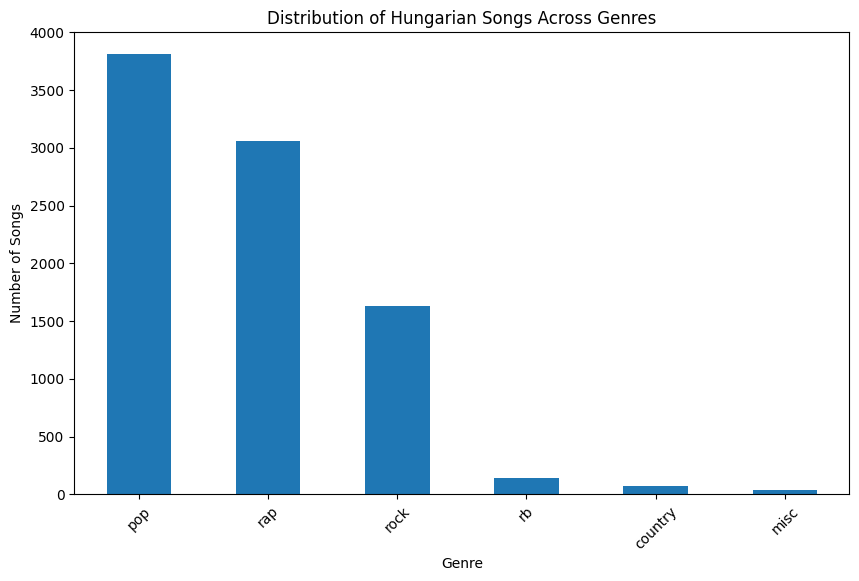

In [7]:
hungarian_genre_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Hungarian Songs Across Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

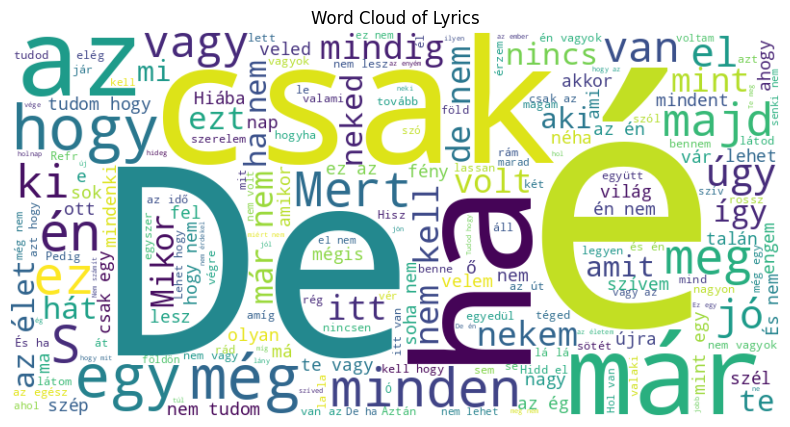

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all lyrics into a single string
all_lyrics = " ".join(corpus)

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Lyrics")
plt.show()

## Model

In [51]:
# Building a Bi-Directional LSTM Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(max_sequence_len - 1,)))
model.add(tf.keras.layers.Embedding(total_words + 1, 100))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(100))
model.add(tf.keras.layers.Dense((total_words + 1) // 2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(total_words + 1, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 31, 100)             │         810,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 31, 300)             │         301,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 31, 300)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4052)                │         409,252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8105)                │      32,849,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,530,917 (131.72 MB)

 Trainable params: 34,530,917 (131.72 MB)

 Non-trainable params: 0 (0.00 B)

None


In [52]:
history = model.fit(predictors, label, epochs=150, verbose=0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

## Hungarian pop music from the period 2015-2020 lyrics generation


> seed_text translations

**"Szeretlek, de nem mondhatom el"**
(I love you, but I can't tell you)

---

**"Táncoljunk a holdfényben"**
(Let's dance in the moonlight)

---

**"A szíved ritmusa"**
(The rhythm of your heart)

---

**"Csak te és én"**
(Only you and me)

---

**"Várj rám"**
(Wait for me)

---

**"Könnyek közt"**
(In tears)

---

**"Szerelem"**
(Love)

In [57]:
seed_texts = ["Szeretlek, de nem mondhatom el",
              "Táncoljunk a holdfényben",
							       "A szíved ritmusa",
										    "Csak te és én",
												  "Várj rám",
													 "Könnyek közt",
													 "Szerelem"]
next_words = 30
output_texts = []

for seed_text in seed_texts:
    output_text = seed_text
    for i in range(next_words):
        token_list = tokenizer.texts_to_sequences([output_text])[0]
        token_list = tf.keras.utils.pad_sequences(
            [token_list], maxlen=max_sequence_len - 1, padding='pre'
        )
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ""

        # Find the corresponding word for the predicted index
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break

        output_text += " " + output_word

        # \n after every 6 words
        if (i + 1) % 6 == 0:
            output_text += "\n"

    # Save the generated text for this seed
    output_texts.append(output_text)

# Print the output
for i, seed_text in enumerate(seed_texts):
    print(f"Seed Text: {seed_text}")
    print(f"Generated Text:\n{output_texts[i]}")
    print("-" * 40)

Seed Text: Szeretlek, de nem mondhatom el
Generated Text:
Szeretlek, de nem mondhatom el mindenki szeret van hedonista benned él
 mondok ívesen országalmával kannibálok nova la
 vista itt mindenki vidám ha megint
 szürkeségből fénnyé vált mert nem látsz
 az a hajad drága gáz kacsintson

----------------------------------------
Seed Text: Táncoljunk a holdfényben
Generated Text:
Táncoljunk a holdfényben kezed levegõt markol mikor keresi két
 kezem koppan a koponyacsont máriá ját
 kelt japánba' kurvája elesek a legfényesebb
 láncomat menne még ha telt rád
 magához örökre lsz fuldoklok a parton ejti a

----------------------------------------
Seed Text: A szíved ritmusa
Generated Text:
A szíved ritmusa add a nevemet láncomat szagúak imátok
 fokán gyógyszertár keret arcot szagúak végrehajtók
 elvis végrehajtók elvis végrehajtók elvis elvis
 elvis elvis végrehajtók elvis végrehajtók elvis
 elvis elvis elvis elvis elvis fontos

----------------------------------------
Seed Text: Csak te és é